In [71]:
# import libraries
from typing import List, Dict, Tuple, Optional, Any, Literal, Union

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as pltl
import plotly.io as pio
import plotly.express as px
import plotly.subplots as sp
import os
import math


In [72]:
dataset = 'D:\MINI_Project\DoAn3\Data\Students_Grading_Dataset.csv'
df = pd.read_csv(dataset)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16716\3142026014.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataset = 'D:\MINI_Project\DoAn3\Data\Students_Grading_Dataset.csv'


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


# 1. Data Preprocessing

## 1.1. Simple Data Overview

In [73]:
df.info()

# Parent_Education_Level      3975 non-null   object bị thiếu nè -.-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [74]:
# Fill missing data
df['Parent_Education_Level']=df['Parent_Education_Level'].fillna('Unknown')
df['Parent_Education_Level']

0          Master's
1       High School
2       High School
3       High School
4          Master's
           ...     
4995       Master's
4996        Unknown
4997        Unknown
4998            PhD
4999            PhD
Name: Parent_Education_Level, Length: 5000, dtype: object

In [75]:
# liệt kê xem mỗi cột có những giá trị nào
for col in [
    "Gender", "Age", "Department", "Grade",
    "Extracurricular_Activities", "Internet_Access_at_Home",
    "Parent_Education_Level", "Family_Income_Level", "Stress_Level (1-10)"]:
    print(f"Unique values for {col}:", df[col].unique())


Unique values for Gender: ['Female' 'Male']
Unique values for Age: [22 18 24 23 21 19 20]
Unique values for Department: ['Mathematics' 'Business' 'Engineering' 'CS']
Unique values for Grade: ['C' 'F' 'A' 'D' 'B']
Unique values for Extracurricular_Activities: ['Yes' 'No']
Unique values for Internet_Access_at_Home: ['No' 'Yes']
Unique values for Parent_Education_Level: ["Master's" 'High School' 'Unknown' "Bachelor's" 'PhD']
Unique values for Family_Income_Level: ['Medium' 'Low' 'High']
Unique values for Stress_Level (1-10): [ 1  4  9  8  6  2  5  7 10  3]


In [76]:
check_Grade = df[["Total_Score", "Grade"]]
check_Grade.head()

# để chỉnh lại grade điểm cuối cùng 51 mà ra có A

,Total_Score,Grade
0,83.49,C
1,92.29,F
2,93.55,F
3,51.03,A
4,90.91,A


In [77]:
"""
9,0-10 tương ứng với A+
8,5-8,9 tương ứng với A
8,0- 8,4 tương ứng với B+
7,0-7,9 tương ứng với B
6,5-6,9 tương ứng với C+
5,5-6,4 tương ứng với C
5,0-5,4 tương ứng với D+
4,0-4,9 tương ứng với D
khỏi làm mấy phần + cho nhanh
"""

import numpy as np
from typing import Literal

# 🧠 Hàm chuyển điểm số (0–100) sang xếp loại chữ (A, B, C, D, F)
def score_to_grade(score: float) -> Literal['A', 'B', 'C', 'D', 'F']:
    # 🎯 Quy ước điểm số và xếp loại:
    grade_mapping = {
        (85, 101): 'A',   # 85 đến dưới 101 → A
        (70, 85): 'B',    # 70 đến dưới 85  → B
        (55, 70): 'C',    # 55 đến dưới 70  → C
        (40, 55): 'D',    # 40 đến dưới 55  → D
        (0, 40): 'F'      # 0  đến dưới 40  → F
    }

    # 🔁 Kiểm tra điểm số thuộc khoảng nào
    for (lower, upper), grade in grade_mapping.items():
        if lower <= score < upper:
            return grade

    # ❌ Nếu không nằm trong khoảng nào → báo lỗi
    raise ValueError(f"Invalid score ({score})")

In [78]:
# 🧮 Đếm số học sinh có điểm số không khớp với xếp loại Grade đã cho
# - Dùng apply() để áp dụng hàm score_to_grade cho từng dòng trong cột Total_Score
# - So sánh kết quả với cột Grade ban đầu
# - Dùng np.count_nonzero để đếm số lượng dòng bị sai lệch
#mismatch_count = np.count_nonzero(df['Total_Score'].apply(score_to_grade) != df['Grade'])

# 🖨️ In ra số lượng xếp loại không khớp
#print("Số lượng học sinh có Grade không khớp với Total_Score:", mismatch_count)

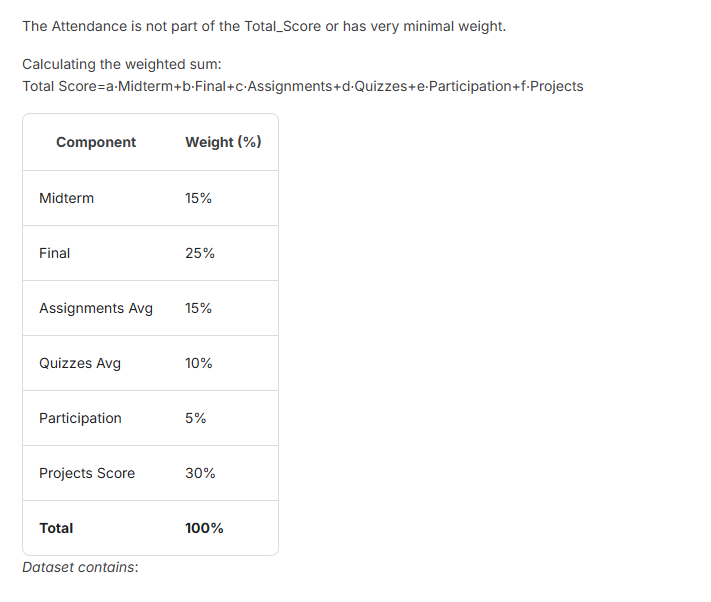

In [79]:
import pandas as pd

# Tính Total_Score với các trọng số mới
df['Total_Score'] = (
    0.15 * df['Midterm_Score'].fillna(0) +
    0.25 * df['Final_Score'].fillna(0) +
    0.15 * df['Assignments_Avg'].fillna(0) +
    0.10 * df['Quizzes_Avg'].fillna(0) +
    0.05 * df['Participation_Score'].fillna(0) * 10 +  # Scale Participation_Score (0-10) to 0-100
    0.30 * df['Projects_Score'].fillna(0)
).clip(0, 100) # Đảm bảo không có giá trị nào vượt quá 100 hoặc nhỏ hơn 0 (do có thể có điểm âm hoặc lỗi nhập liệu).




"""
score_weights = {
# Inspired by UET's method of achieving Total Scores.
    # Participation: 10%
    "Attendance (%)": 0.025,
    "Quizzes_Avg": 0.025,
    "Participation_Score": 0.05,
    # Midterm: 30%
    "Assignments_Avg": 0.15,
    "Midterm_Score": 0.15,
    # Finals: 60%
    "Final_Score": 0.30,
    "Projects_Score": 0.30,
}

df['Total_Score'] = (
    df["Attendance (%)"] * score_weights["Attendance (%)"] +
    df["Midterm_Score"] * score_weights["Midterm_Score"] +
    df["Final_Score"] * score_weights["Final_Score"] +
    df["Assignments_Avg"] * score_weights["Assignments_Avg"] +
    df["Quizzes_Avg"] * score_weights["Quizzes_Avg"] +
    (df["Participation_Score"] * 10 * score_weights["Participation_Score"]) +  # multiplied by 10 as its range is [0;10] and not [0;100]
    df["Projects_Score"] * score_weights["Projects_Score"]
).clip(0, 100)
"""


'\nscore_weights = {\n# Inspired by UET\'s method of achieving Total Scores.\n    # Participation: 10%\n    "Attendance (%)": 0.025,\n    "Quizzes_Avg": 0.025,\n    "Participation_Score": 0.05,\n    # Midterm: 30%\n    "Assignments_Avg": 0.15,\n    "Midterm_Score": 0.15,\n    # Finals: 60%\n    "Final_Score": 0.30,\n    "Projects_Score": 0.30,\n}\n\ndf[\'Total_Score\'] = (\n    df["Attendance (%)"] * score_weights["Attendance (%)"] +\n    df["Midterm_Score"] * score_weights["Midterm_Score"] +\n    df["Final_Score"] * score_weights["Final_Score"] +\n    df["Assignments_Avg"] * score_weights["Assignments_Avg"] +\n    df["Quizzes_Avg"] * score_weights["Quizzes_Avg"] +\n    (df["Participation_Score"] * 10 * score_weights["Participation_Score"]) +  # multiplied by 10 as its range is [0;10] and not [0;100]\n    df["Projects_Score"] * score_weights["Projects_Score"]\n).clip(0, 100)\n'

In [80]:
# Fix grading
# Gán giá trị cột 'Grade' bằng cách áp dụng hàm score_to_grade cho mỗi giá trị trong cột 'Total_Score'
df['Grade'] = df['Total_Score'].apply(score_to_grade)
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,C,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,D,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,B,13.3,Yes,No,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,51.66,53.5470,D,7.8,No,No,Master's,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,52.33,59.0240,C,24.2,No,Yes,Unknown,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,97.89,74.7560,B,7.6,No,Yes,Unknown,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,...,84.74,68.6585,C,14.5,Yes,No,PhD,Medium,10,5.9


In [81]:
for col in [
    "Gender", "Age", "Department", "Grade",
    "Extracurricular_Activities", "Internet_Access_at_Home",
    "Parent_Education_Level", "Family_Income_Level", "Stress_Level (1-10)"]:
    print(f"Unique values for {col}:", df[col].unique())

Unique values for Gender: ['Female' 'Male']
Unique values for Age: [22 18 24 23 21 19 20]
Unique values for Department: ['Mathematics' 'Business' 'Engineering' 'CS']
Unique values for Grade: ['C' 'B' 'D' 'A']
Unique values for Extracurricular_Activities: ['Yes' 'No']
Unique values for Internet_Access_at_Home: ['No' 'Yes']
Unique values for Parent_Education_Level: ["Master's" 'High School' 'Unknown' "Bachelor's" 'PhD']
Unique values for Family_Income_Level: ['Medium' 'Low' 'High']
Unique values for Stress_Level (1-10): [ 1  4  9  8  6  2  5  7 10  3]


In [82]:
# Post-cleaning Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
# Xuất DataFrame df ra file CSV
df.to_csv('students_grading_dataset_clean.csv', index=True)
#df.to_csv('#students_grading_dataset_cleanDIEM.csv', index=False)


In [84]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,4.996372,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,2.898978,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,2.507500,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,4.960000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,7.550000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,10.000000,100.00000,95.091500,30.000000,10.000000,9.000000


| Chỉ số     | Ý nghĩa                                                                  |
| ---------- | ------------------------------------------------------------------------ |
| `count`    | Số lượng giá trị không bị thiếu (non-null) trong cột. Ở đây là 5000 mẫu. |
| `mean`     | Giá trị trung bình của cột.                                              |
| `std`      | Độ lệch chuẩn (standard deviation) - đo mức độ phân tán dữ liệu.         |
| `min`      | Giá trị nhỏ nhất trong cột.                                              |
| `25%` (Q1) | Phân vị thứ 25 - 25% số liệu nằm dưới giá trị này.                       |
| `50%` (Q2) | Phân vị thứ 50 - còn gọi là **median** (trung vị).                       |
| `75%` (Q3) | Phân vị thứ 75 - 75% số liệu nằm dưới giá trị này.                       |
| `max`      | Giá trị lớn nhất trong cột.                                              |


# Một số nhận xét sơ bộ:

Tổng điểm và các thành phần điểm (Assignments, Quizzes, Projects...) có phân phối khá tương đồng — trung bình khoảng 75, độ lệch chuẩn ~14, cho thấy sự đồng đều.

Participation_Score có trung bình thấp (~5/10), cho thấy mức độ tham gia của sinh viên không cao.

Stress_Level trung bình là 5.5/10, có thể xem là mức độ căng thẳng trung bình.

Sleep_Hours_per_Night dao động từ 4 đến 9 giờ — trung bình là 6.5 giờ/ngày, phù hợp với sinh viên.